## Hard-Margin SVM Using Dual Optimization with CVXOPT (Quadratic Programming Approach)

### Importing Libraries

In [1]:
import numpy as np
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt

### Generating Synthetic Data

In [2]:
np.random.seed(0)
X = np.vstack([np.random.randn(20 , 2) - [2 , 2] , np.random.randn(20 , 2) + [2 , 2]])
y = np.hstack([-np.ones(20) , np.ones(20)])

### Parameters

In [3]:
N = X.shape[0]

# Gram matrix : G[i][j] = y_i * y_j * <x_i, x_j>
Gtmp = np.dot(X , X.T) * np.outer(y , y)
G = cvxopt.matrix(Gtmp)

# Linear term in the objective
q = cvxopt.matrix(-np.ones(N))

# Inequality constraints: alpha_i >= 0
M = cvxopt.matrix(-np.eye(N))
h = cvxopt.matrix(np.zeros(N))

# Equality constraint: sum(alpha_i * y_i) = 0
A = cvxopt.matrix(y , (1 , N))
d = cvxopt.matrix(0.0)

### Solving the Dual Problem

In [4]:
# Disable solver output for cleaner display
cvxopt.solvers.options['show_progress'] = False

# Solve the quadratic programming problem
qp_solution = cvxopt.solvers.qp(G , q , M , h , A , d)

# Extract the optimal Lagrange multipliers (alpha values)
alpha_optimal = np.ravel(qp_solution['x'])

### SVMs

In [10]:
# Get indices of support vectors (non-zero alpha)
support_vector_indices = np.where(alpha_optimal > 1e-5)[0]

# Extract support vectors and their labels
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]

# Compute weight vector w using support vectors
w = np.sum((alpha_optimal[support_vector_indices] * support_vector_labels).reshape(-1 , 1) * support_vectors , axis=0)

# Compute bias term b
b = np.mean(support_vector_labels - np.dot(support_vectors , w))

# Calculate margin = 1 / ||w||
margin = 1 / np.linalg.norm(w)
print("Margin:" , margin)

# Print support vectors with labels
print("Support Vectors:")
for i in range(len(support_vector_indices)):
    idx = support_vector_indices[i]
    print("Support Vector {}: {}, Label = {}".format(i + 1 , support_vectors[i] , support_vector_labels[i]))

Margin: 0.9000757383159304
Support Vectors:
Support Vector 1: [-1.02126202  0.2408932 ], Label = -1.0
Support Vector 2: [-0.46722079 -0.53064123], Label = -1.0
Support Vector 3: [0.95144703 0.57998206], Label = 1.0


### Plotting 

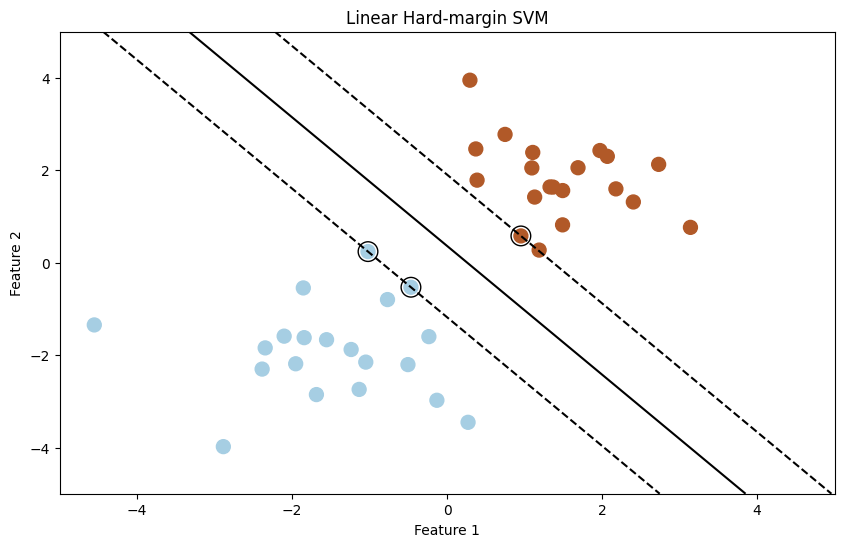

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Create grid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)

# Plot margin and decision boundary
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Hard-margin SVM')
plt.show()